In [88]:
#Importing the Data Manipulation Libraries
import numpy as np
import pandas as pd
#Importing the Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
#Importing Data Filter Warning Libraries 
import warnings
warnings.filterwarnings('ignore')
#Importing Logging Library 
import logging
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s',
                    filemode='w',
                    filename='model.log',force=True)

#Importing Sci-kit Libraries 
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [89]:
url = 'https://raw.githubusercontent.com/meet-vasita/Loan-Approval-Classification-Model/refs/heads/main/Dataset/loan_data.csv'

df = pd.read_csv(url)
df.sample(frac=0.5) #Shuffling 50% of the dataset

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
11712,26.0,female,Master,92502.0,3,RENT,10000.0,DEBTCONSOLIDATION,10.71,0.11,3.0,620,Yes,0
44900,33.0,male,Bachelor,70148.0,10,RENT,20997.0,EDUCATION,16.29,0.30,5.0,554,No,1
15928,26.0,male,Master,12254.0,2,RENT,2950.0,VENTURE,17.49,0.24,2.0,613,No,1
27081,32.0,male,High School,104534.0,10,RENT,1600.0,EDUCATION,13.23,0.02,9.0,560,No,0
24378,31.0,male,Bachelor,87154.0,11,MORTGAGE,5000.0,VENTURE,6.92,0.06,10.0,628,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10634,26.0,male,High School,84455.0,0,MORTGAGE,5000.0,VENTURE,11.66,0.06,4.0,668,Yes,0
20841,28.0,female,Bachelor,59640.0,7,RENT,5000.0,PERSONAL,12.42,0.08,7.0,713,Yes,0
13159,26.0,male,Bachelor,108141.0,6,MORTGAGE,5800.0,EDUCATION,11.97,0.05,2.0,670,No,0
8827,24.0,male,Associate,50997.0,2,RENT,8000.0,MEDICAL,10.59,0.16,4.0,589,Yes,0


In [90]:
#Problem Definition
'''
1. To predict whether the person is eligble to approve a loan or not
2. To Understand the business model and provide a suitable soolution for the same.
'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

<Axes: >

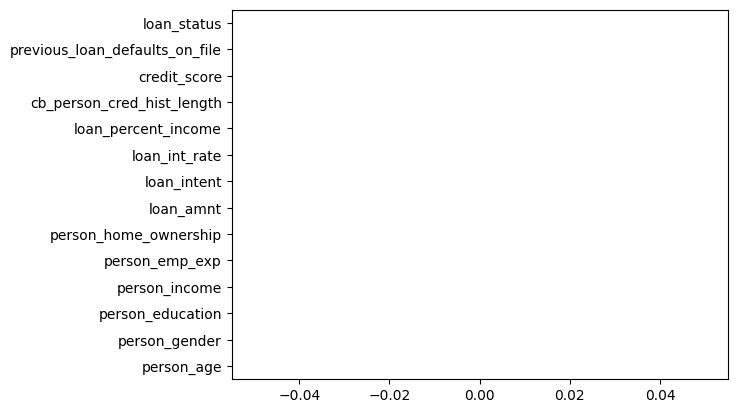

In [91]:
#Checking the null values stats using graphical method
df.isna().sum().plot(kind='barh')

In [92]:
#Evaluate Descriptive Stats: EDA

#Step 1: Segregate Categorical Columns and Numerical Columns

categorical_col = df.select_dtypes(include=object)
numerical_col = df.select_dtypes(include=['int64','float64'])  

In [93]:
#Step2 : Evaluate Descriptive Stats

'''
Step1: Creating a blank list
Step1: Using Ordered Dict Create Dictionary
Step1: append list : stats[]
Step1: Convert appended list into a dataframe

'''

from collections import OrderedDict

stats = []

for i in numerical_col.columns:
    categorical_stats = OrderedDict({
        'Feature':i,
        'Mean':df[i].mean(),
        'Medain':df[i].median(),
        'Mode':df[i].mode()[0],
        'Q1':df[i].quantile(0.25),
        'Q3':df[i].quantile(0.75),
        'IQR':df[i].quantile(0.75) - df[i].quantile(0.25),
        'Standard Deviation':df[i].std(),
        'Skewness':df[i].skew(),  
        'Kurtosis':df[i].kurt(),
        'Max':df[i].max(),
        'Min':df[i].min(),
        'Variance':df[i].var(),
        'Count':df[i].count()
    })
    stats.append(categorical_stats)
    report = pd.DataFrame(stats)

report



,Feature,Mean,Medain,Mode,Q1,Q3,IQR,Standard Deviation,Skewness,Kurtosis,Max,Min,Variance,Count
0,person_age,27.764178,26.00,23.00,24.00,30.00,6.00,6.045108,2.548154,18.649449,144.00,20.00,3.654333e+01,45000
1,person_income,80319.053222,67048.00,8000.00,47204.00,95789.25,48585.25,80422.498632,34.137583,2398.684769,7200766.00,8000.00,6.467778e+09,45000
2,person_emp_exp,5.410333,4.00,0.00,1.00,8.00,7.00,6.063532,2.594917,19.168324,125.00,0.00,3.676642e+01,45000
3,loan_amnt,9583.157556,8000.00,10000.00,5000.00,12237.25,7237.25,6314.886691,1.179731,1.351215,35000.00,500.00,3.987779e+07,45000
4,loan_int_rate,11.006606,11.01,11.01,8.59,12.99,4.40,2.978808,0.213784,-0.420335,20.00,5.42,8.873299e+00,45000
5,loan_percent_income,0.139725,0.12,0.08,0.07,0.19,0.12,0.087212,1.034512,1.082416,0.66,0.00,7.605987e-03,45000
6,cb_person_cred_hist_length,5.867489,4.00,4.00,3.00,8.00,5.00,3.879702,1.631720,3.725945,30.00,2.00,1.505209e+01,45000
7,credit_score,632.608756,640.00,658.00,601.00,670.00,69.00,50.435865,-0.610261,0.203022,850.00,390.00,2.543776e+03,45000
8,loan_status,0.222222,0.00,0.00,0.00,0.00,0.00,0.415744,1.336351,-0.214176,1.00,0.00,1.728433e-01,45000


In [94]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in categorical_col.columns:
    df[i] = le.fit_transform(df[i])

In [95]:
# Concept of Data Leakage
'''
Step1: Split the dataset into X and y
        X: Independent
        y: Dependent / Target

Step2: Split the data into train and test
        train data: Seen Data
        test data: Unseen Data

Step3: Try Balance the target column in case of classification problem
        Imbalance Technique: 1. Oversampling 2. Undersampling
    
Step4: Use Scaling Technique:
        MinMax Scaler
        Robust Scaler
        Standard Scaler
 
Step5: Model Building
'''

#step1:
X = df.drop(columns='loan_status',axis=1)
y = df['loan_status']

#step2:

#Step2: Split the dataset into train and test
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=0.30,random_state=42)

#Step3: 
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_train,y_train = sm.fit_resample(X_train,y_train)
y_train.value_counts()

#Step 4:

sc = RobustScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [96]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier().fit(X_train,y_train)
y_pred_RF = RF.predict(X_test)

print('The Model Accuracy for the Random Forest Classifier: ',accuracy_score(y_test,y_pred_RF)*100)

The Model Accuracy for the Random Forest Classifier:  90.37037037037037


In [97]:
import xgboost as xg

xgb = xg.XGBClassifier(random_state = 42).fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

print('Model Accuracy for XGBoost Classifier: ',accuracy_score(y_test,y_pred_xgb)*100)

Model Accuracy for XGBoost Classifier:  92.66666666666666


In [98]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier().fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

print('Model Accuracy for ADABoost Classifier:',accuracy_score(y_test,y_pred_ada)*100)

Model Accuracy for ADABoost Classifier: 87.65925925925926


In [99]:
from sklearn.ensemble import GradientBoostingClassifier

gbr = GradientBoostingClassifier().fit(X_train,y_train)
y_pred_gbr = gbr.predict(X_test)

print('Model Accuracy for Gradient Boosting Classifier:',accuracy_score(y_test,y_pred_gbr)*100)

Model Accuracy for Gradient Boosting Classifier: 89.13333333333333


In [100]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
y_pred_knn = KNN.predict(X_test)

print('Model Accuracy for KNN Neighbors Classifier:',accuracy_score(y_test,y_pred_knn)*100)


Model Accuracy for KNN Neighbors Classifier: 85.6148148148148


In [101]:
from sklearn.linear_model import SGDClassifier

SGD = SGDClassifier(random_state=42).fit(X_train,y_train)
y_pred_sgd = SGD.predict(X_test)

print('Model Accuracy for SGD Classifier:',accuracy_score(y_test,y_pred_sgd)*100)

Model Accuracy for SGD Classifier: 85.14814814814815


In [102]:
from sklearn import svm

svm = svm.SVC(random_state=42).fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)

print('Model Accuracy for SVM:',accuracy_score(y_test,y_pred_svm)*100)

Model Accuracy for SVM: 86.98518518518519


In [114]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,random_state=42).fit(X_train,y_train)
y_pred_kmeans = kmeans.predict(X_test)

print('Model Accuracy for kmeans:',accuracy_score(y_test,y_pred_kmeans)*100)

Model Accuracy for kmeans: 17.614814814814814
